# Chart: Receiver Operating Characteristic (ROC) Curves


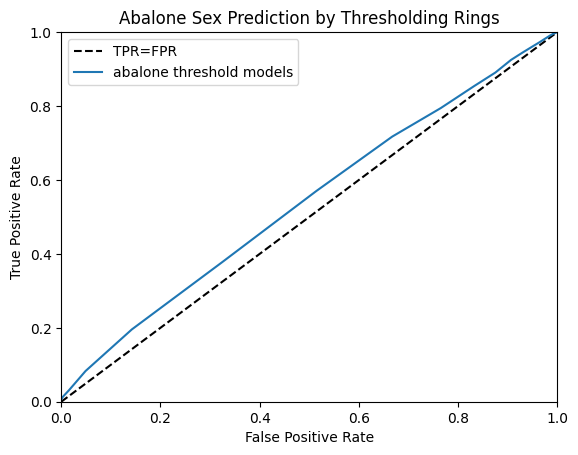

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

abalone_data = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/abalone.tsv", sep="\t")
abalone_data = abalone_data.query("Sex in ('M', 'F')")

roc_data = []

for rings_threshold in sorted(set(abalone_data["Rings"])):
    prediction = abalone_data["Rings"] <= rings_threshold
    target = abalone_data["Sex"] == "M"

    positives = abalone_data["Sex"] == "M"
    negatives = abalone_data["Sex"] != "M"

    true_positives = prediction & positives
    false_positives = prediction & negatives

    false_positive_rate = sum(false_positives) / sum(negatives)
    true_positive_rate = sum(true_positives) / sum(positives)

    # print("THRESHOLD", rings_threshold, "FPR", false_positive_rate, "TPR", true_positive_rate)
    roc_data.append((false_positive_rate, true_positive_rate, rings_threshold))

roc_optimal = roc_data.copy()
roc_optimal.sort()
i = 1
while i < len(roc_optimal):
    if roc_optimal[i-1][0] == roc_optimal[i][0]:
        # same FPR, have better TPR
        roc_optimal[i-1:i] = []
    elif roc_optimal[i-1][1] >= roc_optimal[i][1]:
        # previous has lower FPR and higher TPR
        roc_optimal[i:i+1] = []
    else:
        # prefix looks good
        i = i + 1

plt.plot([0, 1], [0, 1], label="TPR=FPR", color="black", linestyle="--")
plt.plot([r[0] for r in roc_optimal], [r[1] for r in roc_optimal], label="abalone threshold models")

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)

plt.legend()
plt.title("Abalone Sex Prediction by Thresholding Rings")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

None